# Generation of training and testing data from models
****
- Data source: Dr. Michel Curé and Catalina Arcos, IFA UV
- Each model is stored in a file with a name like: "t4000g20v10.dat", where
 - t is the effective temperature: 4000 [K]
 - g is 10 times the logarithm of the gravity in [cm/seg^2]: 20/10 = 2.0
 - v_rot is the rotational velocity in [km/seg]: 10
 
- For this analysis we will consider:
 - v_rot >= 100
 - t_eff >= 15000
 - wavelength range [4460, 4480]

- Note that the y axis is the normalized flux


## Needed libraries

In [1]:
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import shutil

from sklearn.model_selection import train_test_split

epochs=50
prefijo="v3"

text_file = open("../informe1/"+prefijo+"_data.csv", "w")

## Functions

In [2]:
def string2params(string, show=True):
    s1 = string.partition("g")
    t = s1[0][1:]
    s2 = s1[2].partition("v")
    g = s2[0]
    v = s2[-1]
    if show:
        print(s1)
        print("t:",t)
        print(s2)
        print("g: ",float(g)/10)
        print("v:", v)
    return float(t), float(g)/10, float(v)

## Files list

In [3]:
files = glob.glob('../filtered_wv_models/*')
m = len(files)
print("Number of files in models", m)
print("5 first files: \n", files[0:5])


Number of files in models 5425
5 first files: 
 ['../filtered_wv_models\\f_t15000g20v100.dat', '../filtered_wv_models\\f_t15000g20v110.dat', '../filtered_wv_models\\f_t15000g20v120.dat', '../filtered_wv_models\\f_t15000g20v130.dat', '../filtered_wv_models\\f_t15000g20v140.dat']


## Building X an y matrices
*****

In [4]:
print("--> X has dimension", m, " x 201")
print("--> y has diemsnion", m, " x 3")

y = np.zeros((m,3))
df = pd.read_csv(files[0], sep=" ", header=None)
x_points = df[0].values
n_points, n_columns = df.shape
display(df[1].values.shape)
print("Num. of points in x axis: ", n_points)



--> X has dimension 5425  x 201
--> y has diemsnion 5425  x 3


(201,)

Num. of points in x axis:  201


In [5]:
# X matrix contains the spectral lines
X = np.zeros((m,n_points))
# y matrix contains the labels of each spectral line
y = np.zeros((m,3))
for i,name in enumerate(files):
    file_name = name.split("\\")[-1].split(".")[0]
    print(file_name)
    df = pd.read_csv(name, sep=" ", header=None)
    print(file_name.split("_")[1])
    t,g,v = string2params(file_name.split("_")[1])
    X[i,:] = df[1].values
    y[i] = t,g,v
    #print("----")

f_t15000g20v100
t15000g20v100
('t15000', 'g', '20v100')
t: 15000
('20', 'v', '100')
g:  2.0
v: 100
f_t15000g20v110
t15000g20v110
('t15000', 'g', '20v110')
t: 15000
('20', 'v', '110')
g:  2.0
v: 110
f_t15000g20v120
t15000g20v120
('t15000', 'g', '20v120')
t: 15000
('20', 'v', '120')
g:  2.0
v: 120
f_t15000g20v130
t15000g20v130
('t15000', 'g', '20v130')
t: 15000
('20', 'v', '130')
g:  2.0
v: 130
f_t15000g20v140
t15000g20v140
('t15000', 'g', '20v140')
t: 15000
('20', 'v', '140')
g:  2.0
v: 140
f_t15000g20v150
t15000g20v150
('t15000', 'g', '20v150')
t: 15000
('20', 'v', '150')
g:  2.0
v: 150
f_t15000g20v160
t15000g20v160
('t15000', 'g', '20v160')
t: 15000
('20', 'v', '160')
g:  2.0
v: 160
f_t15000g20v170
t15000g20v170
('t15000', 'g', '20v170')
t: 15000
('20', 'v', '170')
g:  2.0
v: 170
f_t15000g20v180
t15000g20v180
('t15000', 'g', '20v180')
t: 15000
('20', 'v', '180')
g:  2.0
v: 180
f_t15000g20v190
t15000g20v190
('t15000', 'g', '20v190')
t: 15000
('20', 'v', '190')
g:  2.0
v: 190
f_t15000g2

t15000g45v170
('t15000', 'g', '45v170')
t: 15000
('45', 'v', '170')
g:  4.5
v: 170
f_t15000g45v180
t15000g45v180
('t15000', 'g', '45v180')
t: 15000
('45', 'v', '180')
g:  4.5
v: 180
f_t15000g45v190
t15000g45v190
('t15000', 'g', '45v190')
t: 15000
('45', 'v', '190')
g:  4.5
v: 190
f_t15000g45v200
t15000g45v200
('t15000', 'g', '45v200')
t: 15000
('45', 'v', '200')
g:  4.5
v: 200
f_t15000g45v210
t15000g45v210
('t15000', 'g', '45v210')
t: 15000
('45', 'v', '210')
g:  4.5
v: 210
f_t15000g45v220
t15000g45v220
('t15000', 'g', '45v220')
t: 15000
('45', 'v', '220')
g:  4.5
v: 220
f_t15000g45v230
t15000g45v230
('t15000', 'g', '45v230')
t: 15000
('45', 'v', '230')
g:  4.5
v: 230
f_t15000g45v240
t15000g45v240
('t15000', 'g', '45v240')
t: 15000
('45', 'v', '240')
g:  4.5
v: 240
f_t15000g45v250
t15000g45v250
('t15000', 'g', '45v250')
t: 15000
('45', 'v', '250')
g:  4.5
v: 250
f_t15000g45v260
t15000g45v260
('t15000', 'g', '45v260')
t: 15000
('45', 'v', '260')
g:  4.5
v: 260
f_t15000g45v270
t15000g45v

t16000g40v290
('t16000', 'g', '40v290')
t: 16000
('40', 'v', '290')
g:  4.0
v: 290
f_t16000g40v300
t16000g40v300
('t16000', 'g', '40v300')
t: 16000
('40', 'v', '300')
g:  4.0
v: 300
f_t16000g40v310
t16000g40v310
('t16000', 'g', '40v310')
t: 16000
('40', 'v', '310')
g:  4.0
v: 310
f_t16000g40v320
t16000g40v320
('t16000', 'g', '40v320')
t: 16000
('40', 'v', '320')
g:  4.0
v: 320
f_t16000g40v330
t16000g40v330
('t16000', 'g', '40v330')
t: 16000
('40', 'v', '330')
g:  4.0
v: 330
f_t16000g40v340
t16000g40v340
('t16000', 'g', '40v340')
t: 16000
('40', 'v', '340')
g:  4.0
v: 340
f_t16000g40v350
t16000g40v350
('t16000', 'g', '40v350')
t: 16000
('40', 'v', '350')
g:  4.0
v: 350
f_t16000g40v360
t16000g40v360
('t16000', 'g', '40v360')
t: 16000
('40', 'v', '360')
g:  4.0
v: 360
f_t16000g40v370
t16000g40v370
('t16000', 'g', '40v370')
t: 16000
('40', 'v', '370')
g:  4.0
v: 370
f_t16000g40v380
t16000g40v380
('t16000', 'g', '40v380')
t: 16000
('40', 'v', '380')
g:  4.0
v: 380
f_t16000g40v390
t16000g40v

t17000g40v180
('t17000', 'g', '40v180')
t: 17000
('40', 'v', '180')
g:  4.0
v: 180
f_t17000g40v190
t17000g40v190
('t17000', 'g', '40v190')
t: 17000
('40', 'v', '190')
g:  4.0
v: 190
f_t17000g40v200
t17000g40v200
('t17000', 'g', '40v200')
t: 17000
('40', 'v', '200')
g:  4.0
v: 200
f_t17000g40v210
t17000g40v210
('t17000', 'g', '40v210')
t: 17000
('40', 'v', '210')
g:  4.0
v: 210
f_t17000g40v220
t17000g40v220
('t17000', 'g', '40v220')
t: 17000
('40', 'v', '220')
g:  4.0
v: 220
f_t17000g40v230
t17000g40v230
('t17000', 'g', '40v230')
t: 17000
('40', 'v', '230')
g:  4.0
v: 230
f_t17000g40v240
t17000g40v240
('t17000', 'g', '40v240')
t: 17000
('40', 'v', '240')
g:  4.0
v: 240
f_t17000g40v250
t17000g40v250
('t17000', 'g', '40v250')
t: 17000
('40', 'v', '250')
g:  4.0
v: 250
f_t17000g40v260
t17000g40v260
('t17000', 'g', '40v260')
t: 17000
('40', 'v', '260')
g:  4.0
v: 260
f_t17000g40v270
t17000g40v270
('t17000', 'g', '40v270')
t: 17000
('40', 'v', '270')
g:  4.0
v: 270
f_t17000g40v280
t17000g40v

t18000g35v400
('t18000', 'g', '35v400')
t: 18000
('35', 'v', '400')
g:  3.5
v: 400
f_t18000g40v100
t18000g40v100
('t18000', 'g', '40v100')
t: 18000
('40', 'v', '100')
g:  4.0
v: 100
f_t18000g40v110
t18000g40v110
('t18000', 'g', '40v110')
t: 18000
('40', 'v', '110')
g:  4.0
v: 110
f_t18000g40v120
t18000g40v120
('t18000', 'g', '40v120')
t: 18000
('40', 'v', '120')
g:  4.0
v: 120
f_t18000g40v130
t18000g40v130
('t18000', 'g', '40v130')
t: 18000
('40', 'v', '130')
g:  4.0
v: 130
f_t18000g40v140
t18000g40v140
('t18000', 'g', '40v140')
t: 18000
('40', 'v', '140')
g:  4.0
v: 140
f_t18000g40v150
t18000g40v150
('t18000', 'g', '40v150')
t: 18000
('40', 'v', '150')
g:  4.0
v: 150
f_t18000g40v160
t18000g40v160
('t18000', 'g', '40v160')
t: 18000
('40', 'v', '160')
g:  4.0
v: 160
f_t18000g40v170
t18000g40v170
('t18000', 'g', '40v170')
t: 18000
('40', 'v', '170')
g:  4.0
v: 170
f_t18000g40v180
t18000g40v180
('t18000', 'g', '40v180')
t: 18000
('40', 'v', '180')
g:  4.0
v: 180
f_t18000g40v190
t18000g40v

t19000g35v260
('t19000', 'g', '35v260')
t: 19000
('35', 'v', '260')
g:  3.5
v: 260
f_t19000g35v270
t19000g35v270
('t19000', 'g', '35v270')
t: 19000
('35', 'v', '270')
g:  3.5
v: 270
f_t19000g35v280
t19000g35v280
('t19000', 'g', '35v280')
t: 19000
('35', 'v', '280')
g:  3.5
v: 280
f_t19000g35v290
t19000g35v290
('t19000', 'g', '35v290')
t: 19000
('35', 'v', '290')
g:  3.5
v: 290
f_t19000g35v300
t19000g35v300
('t19000', 'g', '35v300')
t: 19000
('35', 'v', '300')
g:  3.5
v: 300
f_t19000g35v310
t19000g35v310
('t19000', 'g', '35v310')
t: 19000
('35', 'v', '310')
g:  3.5
v: 310
f_t19000g35v320
t19000g35v320
('t19000', 'g', '35v320')
t: 19000
('35', 'v', '320')
g:  3.5
v: 320
f_t19000g35v330
t19000g35v330
('t19000', 'g', '35v330')
t: 19000
('35', 'v', '330')
g:  3.5
v: 330
f_t19000g35v340
t19000g35v340
('t19000', 'g', '35v340')
t: 19000
('35', 'v', '340')
g:  3.5
v: 340
f_t19000g35v350
t19000g35v350
('t19000', 'g', '35v350')
t: 19000
('35', 'v', '350')
g:  3.5
v: 350
f_t19000g35v360
t19000g35v

t20000g35v210
('t20000', 'g', '35v210')
t: 20000
('35', 'v', '210')
g:  3.5
v: 210
f_t20000g35v220
t20000g35v220
('t20000', 'g', '35v220')
t: 20000
('35', 'v', '220')
g:  3.5
v: 220
f_t20000g35v230
t20000g35v230
('t20000', 'g', '35v230')
t: 20000
('35', 'v', '230')
g:  3.5
v: 230
f_t20000g35v240
t20000g35v240
('t20000', 'g', '35v240')
t: 20000
('35', 'v', '240')
g:  3.5
v: 240
f_t20000g35v250
t20000g35v250
('t20000', 'g', '35v250')
t: 20000
('35', 'v', '250')
g:  3.5
v: 250
f_t20000g35v260
t20000g35v260
('t20000', 'g', '35v260')
t: 20000
('35', 'v', '260')
g:  3.5
v: 260
f_t20000g35v270
t20000g35v270
('t20000', 'g', '35v270')
t: 20000
('35', 'v', '270')
g:  3.5
v: 270
f_t20000g35v280
t20000g35v280
('t20000', 'g', '35v280')
t: 20000
('35', 'v', '280')
g:  3.5
v: 280
f_t20000g35v290
t20000g35v290
('t20000', 'g', '35v290')
t: 20000
('35', 'v', '290')
g:  3.5
v: 290
f_t20000g35v300
t20000g35v300
('t20000', 'g', '35v300')
t: 20000
('35', 'v', '300')
g:  3.5
v: 300
f_t20000g35v310
t20000g35v

t21000g35v250
('t21000', 'g', '35v250')
t: 21000
('35', 'v', '250')
g:  3.5
v: 250
f_t21000g35v260
t21000g35v260
('t21000', 'g', '35v260')
t: 21000
('35', 'v', '260')
g:  3.5
v: 260
f_t21000g35v270
t21000g35v270
('t21000', 'g', '35v270')
t: 21000
('35', 'v', '270')
g:  3.5
v: 270
f_t21000g35v280
t21000g35v280
('t21000', 'g', '35v280')
t: 21000
('35', 'v', '280')
g:  3.5
v: 280
f_t21000g35v290
t21000g35v290
('t21000', 'g', '35v290')
t: 21000
('35', 'v', '290')
g:  3.5
v: 290
f_t21000g35v300
t21000g35v300
('t21000', 'g', '35v300')
t: 21000
('35', 'v', '300')
g:  3.5
v: 300
f_t21000g35v310
t21000g35v310
('t21000', 'g', '35v310')
t: 21000
('35', 'v', '310')
g:  3.5
v: 310
f_t21000g35v320
t21000g35v320
('t21000', 'g', '35v320')
t: 21000
('35', 'v', '320')
g:  3.5
v: 320
f_t21000g35v330
t21000g35v330
('t21000', 'g', '35v330')
t: 21000
('35', 'v', '330')
g:  3.5
v: 330
f_t21000g35v340
t21000g35v340
('t21000', 'g', '35v340')
t: 21000
('35', 'v', '340')
g:  3.5
v: 340
f_t21000g35v350
t21000g35v

t22000g30v380
('t22000', 'g', '30v380')
t: 22000
('30', 'v', '380')
g:  3.0
v: 380
f_t22000g30v390
t22000g30v390
('t22000', 'g', '30v390')
t: 22000
('30', 'v', '390')
g:  3.0
v: 390
f_t22000g30v400
t22000g30v400
('t22000', 'g', '30v400')
t: 22000
('30', 'v', '400')
g:  3.0
v: 400
f_t22000g35v100
t22000g35v100
('t22000', 'g', '35v100')
t: 22000
('35', 'v', '100')
g:  3.5
v: 100
f_t22000g35v110
t22000g35v110
('t22000', 'g', '35v110')
t: 22000
('35', 'v', '110')
g:  3.5
v: 110
f_t22000g35v120
t22000g35v120
('t22000', 'g', '35v120')
t: 22000
('35', 'v', '120')
g:  3.5
v: 120
f_t22000g35v130
t22000g35v130
('t22000', 'g', '35v130')
t: 22000
('35', 'v', '130')
g:  3.5
v: 130
f_t22000g35v140
t22000g35v140
('t22000', 'g', '35v140')
t: 22000
('35', 'v', '140')
g:  3.5
v: 140
f_t22000g35v150
t22000g35v150
('t22000', 'g', '35v150')
t: 22000
('35', 'v', '150')
g:  3.5
v: 150
f_t22000g35v160
t22000g35v160
('t22000', 'g', '35v160')
t: 22000
('35', 'v', '160')
g:  3.5
v: 160
f_t22000g35v170
t22000g35v

t23000g30v110
('t23000', 'g', '30v110')
t: 23000
('30', 'v', '110')
g:  3.0
v: 110
f_t23000g30v120
t23000g30v120
('t23000', 'g', '30v120')
t: 23000
('30', 'v', '120')
g:  3.0
v: 120
f_t23000g30v130
t23000g30v130
('t23000', 'g', '30v130')
t: 23000
('30', 'v', '130')
g:  3.0
v: 130
f_t23000g30v140
t23000g30v140
('t23000', 'g', '30v140')
t: 23000
('30', 'v', '140')
g:  3.0
v: 140
f_t23000g30v150
t23000g30v150
('t23000', 'g', '30v150')
t: 23000
('30', 'v', '150')
g:  3.0
v: 150
f_t23000g30v160
t23000g30v160
('t23000', 'g', '30v160')
t: 23000
('30', 'v', '160')
g:  3.0
v: 160
f_t23000g30v170
t23000g30v170
('t23000', 'g', '30v170')
t: 23000
('30', 'v', '170')
g:  3.0
v: 170
f_t23000g30v180
t23000g30v180
('t23000', 'g', '30v180')
t: 23000
('30', 'v', '180')
g:  3.0
v: 180
f_t23000g30v190
t23000g30v190
('t23000', 'g', '30v190')
t: 23000
('30', 'v', '190')
g:  3.0
v: 190
f_t23000g30v200
t23000g30v200
('t23000', 'g', '30v200')
t: 23000
('30', 'v', '200')
g:  3.0
v: 200
f_t23000g30v210
t23000g30v

t24000g25v120
('t24000', 'g', '25v120')
t: 24000
('25', 'v', '120')
g:  2.5
v: 120
f_t24000g25v130
t24000g25v130
('t24000', 'g', '25v130')
t: 24000
('25', 'v', '130')
g:  2.5
v: 130
f_t24000g25v140
t24000g25v140
('t24000', 'g', '25v140')
t: 24000
('25', 'v', '140')
g:  2.5
v: 140
f_t24000g25v150
t24000g25v150
('t24000', 'g', '25v150')
t: 24000
('25', 'v', '150')
g:  2.5
v: 150
f_t24000g25v160
t24000g25v160
('t24000', 'g', '25v160')
t: 24000
('25', 'v', '160')
g:  2.5
v: 160
f_t24000g25v170
t24000g25v170
('t24000', 'g', '25v170')
t: 24000
('25', 'v', '170')
g:  2.5
v: 170
f_t24000g25v180
t24000g25v180
('t24000', 'g', '25v180')
t: 24000
('25', 'v', '180')
g:  2.5
v: 180
f_t24000g25v190
t24000g25v190
('t24000', 'g', '25v190')
t: 24000
('25', 'v', '190')
g:  2.5
v: 190
f_t24000g25v200
t24000g25v200
('t24000', 'g', '25v200')
t: 24000
('25', 'v', '200')
g:  2.5
v: 200
f_t24000g25v210
t24000g25v210
('t24000', 'g', '25v210')
t: 24000
('25', 'v', '210')
g:  2.5
v: 210
f_t24000g25v220
t24000g25v

t25000g20v380
('t25000', 'g', '20v380')
t: 25000
('20', 'v', '380')
g:  2.0
v: 380
f_t25000g20v390
t25000g20v390
('t25000', 'g', '20v390')
t: 25000
('20', 'v', '390')
g:  2.0
v: 390
f_t25000g20v400
t25000g20v400
('t25000', 'g', '20v400')
t: 25000
('20', 'v', '400')
g:  2.0
v: 400
f_t25000g25v100
t25000g25v100
('t25000', 'g', '25v100')
t: 25000
('25', 'v', '100')
g:  2.5
v: 100
f_t25000g25v110
t25000g25v110
('t25000', 'g', '25v110')
t: 25000
('25', 'v', '110')
g:  2.5
v: 110
f_t25000g25v120
t25000g25v120
('t25000', 'g', '25v120')
t: 25000
('25', 'v', '120')
g:  2.5
v: 120
f_t25000g25v130
t25000g25v130
('t25000', 'g', '25v130')
t: 25000
('25', 'v', '130')
g:  2.5
v: 130
f_t25000g25v140
t25000g25v140
('t25000', 'g', '25v140')
t: 25000
('25', 'v', '140')
g:  2.5
v: 140
f_t25000g25v150
t25000g25v150
('t25000', 'g', '25v150')
t: 25000
('25', 'v', '150')
g:  2.5
v: 150
f_t25000g25v160
t25000g25v160
('t25000', 'g', '25v160')
t: 25000
('25', 'v', '160')
g:  2.5
v: 160
f_t25000g25v170
t25000g25v

t26000g20v340
('t26000', 'g', '20v340')
t: 26000
('20', 'v', '340')
g:  2.0
v: 340
f_t26000g20v350
t26000g20v350
('t26000', 'g', '20v350')
t: 26000
('20', 'v', '350')
g:  2.0
v: 350
f_t26000g20v360
t26000g20v360
('t26000', 'g', '20v360')
t: 26000
('20', 'v', '360')
g:  2.0
v: 360
f_t26000g20v370
t26000g20v370
('t26000', 'g', '20v370')
t: 26000
('20', 'v', '370')
g:  2.0
v: 370
f_t26000g20v380
t26000g20v380
('t26000', 'g', '20v380')
t: 26000
('20', 'v', '380')
g:  2.0
v: 380
f_t26000g20v390
t26000g20v390
('t26000', 'g', '20v390')
t: 26000
('20', 'v', '390')
g:  2.0
v: 390
f_t26000g20v400
t26000g20v400
('t26000', 'g', '20v400')
t: 26000
('20', 'v', '400')
g:  2.0
v: 400
f_t26000g25v100
t26000g25v100
('t26000', 'g', '25v100')
t: 26000
('25', 'v', '100')
g:  2.5
v: 100
f_t26000g25v110
t26000g25v110
('t26000', 'g', '25v110')
t: 26000
('25', 'v', '110')
g:  2.5
v: 110
f_t26000g25v120
t26000g25v120
('t26000', 'g', '25v120')
t: 26000
('25', 'v', '120')
g:  2.5
v: 120
f_t26000g25v130
t26000g25v

t26000g50v340
('t26000', 'g', '50v340')
t: 26000
('50', 'v', '340')
g:  5.0
v: 340
f_t26000g50v350
t26000g50v350
('t26000', 'g', '50v350')
t: 26000
('50', 'v', '350')
g:  5.0
v: 350
f_t26000g50v360
t26000g50v360
('t26000', 'g', '50v360')
t: 26000
('50', 'v', '360')
g:  5.0
v: 360
f_t26000g50v370
t26000g50v370
('t26000', 'g', '50v370')
t: 26000
('50', 'v', '370')
g:  5.0
v: 370
f_t26000g50v380
t26000g50v380
('t26000', 'g', '50v380')
t: 26000
('50', 'v', '380')
g:  5.0
v: 380
f_t26000g50v390
t26000g50v390
('t26000', 'g', '50v390')
t: 26000
('50', 'v', '390')
g:  5.0
v: 390
f_t26000g50v400
t26000g50v400
('t26000', 'g', '50v400')
t: 26000
('50', 'v', '400')
g:  5.0
v: 400
f_t27000g20v100
t27000g20v100
('t27000', 'g', '20v100')
t: 27000
('20', 'v', '100')
g:  2.0
v: 100
f_t27000g20v110
t27000g20v110
('t27000', 'g', '20v110')
t: 27000
('20', 'v', '110')
g:  2.0
v: 110
f_t27000g20v120
t27000g20v120
('t27000', 'g', '20v120')
t: 27000
('20', 'v', '120')
g:  2.0
v: 120
f_t27000g20v130
t27000g20v

t27000g50v160
('t27000', 'g', '50v160')
t: 27000
('50', 'v', '160')
g:  5.0
v: 160
f_t27000g50v170
t27000g50v170
('t27000', 'g', '50v170')
t: 27000
('50', 'v', '170')
g:  5.0
v: 170
f_t27000g50v180
t27000g50v180
('t27000', 'g', '50v180')
t: 27000
('50', 'v', '180')
g:  5.0
v: 180
f_t27000g50v190
t27000g50v190
('t27000', 'g', '50v190')
t: 27000
('50', 'v', '190')
g:  5.0
v: 190
f_t27000g50v200
t27000g50v200
('t27000', 'g', '50v200')
t: 27000
('50', 'v', '200')
g:  5.0
v: 200
f_t27000g50v210
t27000g50v210
('t27000', 'g', '50v210')
t: 27000
('50', 'v', '210')
g:  5.0
v: 210
f_t27000g50v220
t27000g50v220
('t27000', 'g', '50v220')
t: 27000
('50', 'v', '220')
g:  5.0
v: 220
f_t27000g50v230
t27000g50v230
('t27000', 'g', '50v230')
t: 27000
('50', 'v', '230')
g:  5.0
v: 230
f_t27000g50v240
t27000g50v240
('t27000', 'g', '50v240')
t: 27000
('50', 'v', '240')
g:  5.0
v: 240
f_t27000g50v250
t27000g50v250
('t27000', 'g', '50v250')
t: 27000
('50', 'v', '250')
g:  5.0
v: 250
f_t27000g50v260
t27000g50v

t28000g45v340
('t28000', 'g', '45v340')
t: 28000
('45', 'v', '340')
g:  4.5
v: 340
f_t28000g45v350
t28000g45v350
('t28000', 'g', '45v350')
t: 28000
('45', 'v', '350')
g:  4.5
v: 350
f_t28000g45v360
t28000g45v360
('t28000', 'g', '45v360')
t: 28000
('45', 'v', '360')
g:  4.5
v: 360
f_t28000g45v370
t28000g45v370
('t28000', 'g', '45v370')
t: 28000
('45', 'v', '370')
g:  4.5
v: 370
f_t28000g45v380
t28000g45v380
('t28000', 'g', '45v380')
t: 28000
('45', 'v', '380')
g:  4.5
v: 380
f_t28000g45v390
t28000g45v390
('t28000', 'g', '45v390')
t: 28000
('45', 'v', '390')
g:  4.5
v: 390
f_t28000g45v400
t28000g45v400
('t28000', 'g', '45v400')
t: 28000
('45', 'v', '400')
g:  4.5
v: 400
f_t28000g50v100
t28000g50v100
('t28000', 'g', '50v100')
t: 28000
('50', 'v', '100')
g:  5.0
v: 100
f_t28000g50v110
t28000g50v110
('t28000', 'g', '50v110')
t: 28000
('50', 'v', '110')
g:  5.0
v: 110
f_t28000g50v120
t28000g50v120
('t28000', 'g', '50v120')
t: 28000
('50', 'v', '120')
g:  5.0
v: 120
f_t28000g50v130
t28000g50v

t29000g45v190
('t29000', 'g', '45v190')
t: 29000
('45', 'v', '190')
g:  4.5
v: 190
f_t29000g45v200
t29000g45v200
('t29000', 'g', '45v200')
t: 29000
('45', 'v', '200')
g:  4.5
v: 200
f_t29000g45v210
t29000g45v210
('t29000', 'g', '45v210')
t: 29000
('45', 'v', '210')
g:  4.5
v: 210
f_t29000g45v220
t29000g45v220
('t29000', 'g', '45v220')
t: 29000
('45', 'v', '220')
g:  4.5
v: 220
f_t29000g45v230
t29000g45v230
('t29000', 'g', '45v230')
t: 29000
('45', 'v', '230')
g:  4.5
v: 230
f_t29000g45v240
t29000g45v240
('t29000', 'g', '45v240')
t: 29000
('45', 'v', '240')
g:  4.5
v: 240
f_t29000g45v250
t29000g45v250
('t29000', 'g', '45v250')
t: 29000
('45', 'v', '250')
g:  4.5
v: 250
f_t29000g45v260
t29000g45v260
('t29000', 'g', '45v260')
t: 29000
('45', 'v', '260')
g:  4.5
v: 260
f_t29000g45v270
t29000g45v270
('t29000', 'g', '45v270')
t: 29000
('45', 'v', '270')
g:  4.5
v: 270
f_t29000g45v280
t29000g45v280
('t29000', 'g', '45v280')
t: 29000
('45', 'v', '280')
g:  4.5
v: 280
f_t29000g45v290
t29000g45v

t30000g45v210
('t30000', 'g', '45v210')
t: 30000
('45', 'v', '210')
g:  4.5
v: 210
f_t30000g45v220
t30000g45v220
('t30000', 'g', '45v220')
t: 30000
('45', 'v', '220')
g:  4.5
v: 220
f_t30000g45v230
t30000g45v230
('t30000', 'g', '45v230')
t: 30000
('45', 'v', '230')
g:  4.5
v: 230
f_t30000g45v240
t30000g45v240
('t30000', 'g', '45v240')
t: 30000
('45', 'v', '240')
g:  4.5
v: 240
f_t30000g45v250
t30000g45v250
('t30000', 'g', '45v250')
t: 30000
('45', 'v', '250')
g:  4.5
v: 250
f_t30000g45v260
t30000g45v260
('t30000', 'g', '45v260')
t: 30000
('45', 'v', '260')
g:  4.5
v: 260
f_t30000g45v270
t30000g45v270
('t30000', 'g', '45v270')
t: 30000
('45', 'v', '270')
g:  4.5
v: 270
f_t30000g45v280
t30000g45v280
('t30000', 'g', '45v280')
t: 30000
('45', 'v', '280')
g:  4.5
v: 280
f_t30000g45v290
t30000g45v290
('t30000', 'g', '45v290')
t: 30000
('45', 'v', '290')
g:  4.5
v: 290
f_t30000g45v300
t30000g45v300
('t30000', 'g', '45v300')
t: 30000
('45', 'v', '300')
g:  4.5
v: 300
f_t30000g45v310
t30000g45v

t31000g45v170
('t31000', 'g', '45v170')
t: 31000
('45', 'v', '170')
g:  4.5
v: 170
f_t31000g45v180
t31000g45v180
('t31000', 'g', '45v180')
t: 31000
('45', 'v', '180')
g:  4.5
v: 180
f_t31000g45v190
t31000g45v190
('t31000', 'g', '45v190')
t: 31000
('45', 'v', '190')
g:  4.5
v: 190
f_t31000g45v200
t31000g45v200
('t31000', 'g', '45v200')
t: 31000
('45', 'v', '200')
g:  4.5
v: 200
f_t31000g45v210
t31000g45v210
('t31000', 'g', '45v210')
t: 31000
('45', 'v', '210')
g:  4.5
v: 210
f_t31000g45v220
t31000g45v220
('t31000', 'g', '45v220')
t: 31000
('45', 'v', '220')
g:  4.5
v: 220
f_t31000g45v230
t31000g45v230
('t31000', 'g', '45v230')
t: 31000
('45', 'v', '230')
g:  4.5
v: 230
f_t31000g45v240
t31000g45v240
('t31000', 'g', '45v240')
t: 31000
('45', 'v', '240')
g:  4.5
v: 240
f_t31000g45v250
t31000g45v250
('t31000', 'g', '45v250')
t: 31000
('45', 'v', '250')
g:  4.5
v: 250
f_t31000g45v260
t31000g45v260
('t31000', 'g', '45v260')
t: 31000
('45', 'v', '260')
g:  4.5
v: 260
f_t31000g45v270
t31000g45v

t32000g45v200
('t32000', 'g', '45v200')
t: 32000
('45', 'v', '200')
g:  4.5
v: 200
f_t32000g45v210
t32000g45v210
('t32000', 'g', '45v210')
t: 32000
('45', 'v', '210')
g:  4.5
v: 210
f_t32000g45v220
t32000g45v220
('t32000', 'g', '45v220')
t: 32000
('45', 'v', '220')
g:  4.5
v: 220
f_t32000g45v230
t32000g45v230
('t32000', 'g', '45v230')
t: 32000
('45', 'v', '230')
g:  4.5
v: 230
f_t32000g45v240
t32000g45v240
('t32000', 'g', '45v240')
t: 32000
('45', 'v', '240')
g:  4.5
v: 240
f_t32000g45v250
t32000g45v250
('t32000', 'g', '45v250')
t: 32000
('45', 'v', '250')
g:  4.5
v: 250
f_t32000g45v260
t32000g45v260
('t32000', 'g', '45v260')
t: 32000
('45', 'v', '260')
g:  4.5
v: 260
f_t32000g45v270
t32000g45v270
('t32000', 'g', '45v270')
t: 32000
('45', 'v', '270')
g:  4.5
v: 270
f_t32000g45v280
t32000g45v280
('t32000', 'g', '45v280')
t: 32000
('45', 'v', '280')
g:  4.5
v: 280
f_t32000g45v290
t32000g45v290
('t32000', 'g', '45v290')
t: 32000
('45', 'v', '290')
g:  4.5
v: 290
f_t32000g45v300
t32000g45v

t33000g45v230
('t33000', 'g', '45v230')
t: 33000
('45', 'v', '230')
g:  4.5
v: 230
f_t33000g45v240
t33000g45v240
('t33000', 'g', '45v240')
t: 33000
('45', 'v', '240')
g:  4.5
v: 240
f_t33000g45v250
t33000g45v250
('t33000', 'g', '45v250')
t: 33000
('45', 'v', '250')
g:  4.5
v: 250
f_t33000g45v260
t33000g45v260
('t33000', 'g', '45v260')
t: 33000
('45', 'v', '260')
g:  4.5
v: 260
f_t33000g45v270
t33000g45v270
('t33000', 'g', '45v270')
t: 33000
('45', 'v', '270')
g:  4.5
v: 270
f_t33000g45v280
t33000g45v280
('t33000', 'g', '45v280')
t: 33000
('45', 'v', '280')
g:  4.5
v: 280
f_t33000g45v290
t33000g45v290
('t33000', 'g', '45v290')
t: 33000
('45', 'v', '290')
g:  4.5
v: 290
f_t33000g45v300
t33000g45v300
('t33000', 'g', '45v300')
t: 33000
('45', 'v', '300')
g:  4.5
v: 300
f_t33000g45v310
t33000g45v310
('t33000', 'g', '45v310')
t: 33000
('45', 'v', '310')
g:  4.5
v: 310
f_t33000g45v320
t33000g45v320
('t33000', 'g', '45v320')
t: 33000
('45', 'v', '320')
g:  4.5
v: 320
f_t33000g45v330
t33000g45v

t34000g45v230
('t34000', 'g', '45v230')
t: 34000
('45', 'v', '230')
g:  4.5
v: 230
f_t34000g45v240
t34000g45v240
('t34000', 'g', '45v240')
t: 34000
('45', 'v', '240')
g:  4.5
v: 240
f_t34000g45v250
t34000g45v250
('t34000', 'g', '45v250')
t: 34000
('45', 'v', '250')
g:  4.5
v: 250
f_t34000g45v260
t34000g45v260
('t34000', 'g', '45v260')
t: 34000
('45', 'v', '260')
g:  4.5
v: 260
f_t34000g45v270
t34000g45v270
('t34000', 'g', '45v270')
t: 34000
('45', 'v', '270')
g:  4.5
v: 270
f_t34000g45v280
t34000g45v280
('t34000', 'g', '45v280')
t: 34000
('45', 'v', '280')
g:  4.5
v: 280
f_t34000g45v290
t34000g45v290
('t34000', 'g', '45v290')
t: 34000
('45', 'v', '290')
g:  4.5
v: 290
f_t34000g45v300
t34000g45v300
('t34000', 'g', '45v300')
t: 34000
('45', 'v', '300')
g:  4.5
v: 300
f_t34000g45v310
t34000g45v310
('t34000', 'g', '45v310')
t: 34000
('45', 'v', '310')
g:  4.5
v: 310
f_t34000g45v320
t34000g45v320
('t34000', 'g', '45v320')
t: 34000
('45', 'v', '320')
g:  4.5
v: 320
f_t34000g45v330
t34000g45v

t35000g45v250
('t35000', 'g', '45v250')
t: 35000
('45', 'v', '250')
g:  4.5
v: 250
f_t35000g45v260
t35000g45v260
('t35000', 'g', '45v260')
t: 35000
('45', 'v', '260')
g:  4.5
v: 260
f_t35000g45v270
t35000g45v270
('t35000', 'g', '45v270')
t: 35000
('45', 'v', '270')
g:  4.5
v: 270
f_t35000g45v280
t35000g45v280
('t35000', 'g', '45v280')
t: 35000
('45', 'v', '280')
g:  4.5
v: 280
f_t35000g45v290
t35000g45v290
('t35000', 'g', '45v290')
t: 35000
('45', 'v', '290')
g:  4.5
v: 290
f_t35000g45v300
t35000g45v300
('t35000', 'g', '45v300')
t: 35000
('45', 'v', '300')
g:  4.5
v: 300
f_t35000g45v310
t35000g45v310
('t35000', 'g', '45v310')
t: 35000
('45', 'v', '310')
g:  4.5
v: 310
f_t35000g45v320
t35000g45v320
('t35000', 'g', '45v320')
t: 35000
('45', 'v', '320')
g:  4.5
v: 320
f_t35000g45v330
t35000g45v330
('t35000', 'g', '45v330')
t: 35000
('45', 'v', '330')
g:  4.5
v: 330
f_t35000g45v340
t35000g45v340
('t35000', 'g', '45v340')
t: 35000
('45', 'v', '340')
g:  4.5
v: 340
f_t35000g45v350
t35000g45v

t36000g45v230
('t36000', 'g', '45v230')
t: 36000
('45', 'v', '230')
g:  4.5
v: 230
f_t36000g45v240
t36000g45v240
('t36000', 'g', '45v240')
t: 36000
('45', 'v', '240')
g:  4.5
v: 240
f_t36000g45v250
t36000g45v250
('t36000', 'g', '45v250')
t: 36000
('45', 'v', '250')
g:  4.5
v: 250
f_t36000g45v260
t36000g45v260
('t36000', 'g', '45v260')
t: 36000
('45', 'v', '260')
g:  4.5
v: 260
f_t36000g45v270
t36000g45v270
('t36000', 'g', '45v270')
t: 36000
('45', 'v', '270')
g:  4.5
v: 270
f_t36000g45v280
t36000g45v280
('t36000', 'g', '45v280')
t: 36000
('45', 'v', '280')
g:  4.5
v: 280
f_t36000g45v290
t36000g45v290
('t36000', 'g', '45v290')
t: 36000
('45', 'v', '290')
g:  4.5
v: 290
f_t36000g45v300
t36000g45v300
('t36000', 'g', '45v300')
t: 36000
('45', 'v', '300')
g:  4.5
v: 300
f_t36000g45v310
t36000g45v310
('t36000', 'g', '45v310')
t: 36000
('45', 'v', '310')
g:  4.5
v: 310
f_t36000g45v320
t36000g45v320
('t36000', 'g', '45v320')
t: 36000
('45', 'v', '320')
g:  4.5
v: 320
f_t36000g45v330
t36000g45v

t37000g45v250
('t37000', 'g', '45v250')
t: 37000
('45', 'v', '250')
g:  4.5
v: 250
f_t37000g45v260
t37000g45v260
('t37000', 'g', '45v260')
t: 37000
('45', 'v', '260')
g:  4.5
v: 260
f_t37000g45v270
t37000g45v270
('t37000', 'g', '45v270')
t: 37000
('45', 'v', '270')
g:  4.5
v: 270
f_t37000g45v280
t37000g45v280
('t37000', 'g', '45v280')
t: 37000
('45', 'v', '280')
g:  4.5
v: 280
f_t37000g45v290
t37000g45v290
('t37000', 'g', '45v290')
t: 37000
('45', 'v', '290')
g:  4.5
v: 290
f_t37000g45v300
t37000g45v300
('t37000', 'g', '45v300')
t: 37000
('45', 'v', '300')
g:  4.5
v: 300
f_t37000g45v310
t37000g45v310
('t37000', 'g', '45v310')
t: 37000
('45', 'v', '310')
g:  4.5
v: 310
f_t37000g45v320
t37000g45v320
('t37000', 'g', '45v320')
t: 37000
('45', 'v', '320')
g:  4.5
v: 320
f_t37000g45v330
t37000g45v330
('t37000', 'g', '45v330')
t: 37000
('45', 'v', '330')
g:  4.5
v: 330
f_t37000g45v340
t37000g45v340
('t37000', 'g', '45v340')
t: 37000
('45', 'v', '340')
g:  4.5
v: 340
f_t37000g45v350
t37000g45v

t38000g45v240
('t38000', 'g', '45v240')
t: 38000
('45', 'v', '240')
g:  4.5
v: 240
f_t38000g45v250
t38000g45v250
('t38000', 'g', '45v250')
t: 38000
('45', 'v', '250')
g:  4.5
v: 250
f_t38000g45v260
t38000g45v260
('t38000', 'g', '45v260')
t: 38000
('45', 'v', '260')
g:  4.5
v: 260
f_t38000g45v270
t38000g45v270
('t38000', 'g', '45v270')
t: 38000
('45', 'v', '270')
g:  4.5
v: 270
f_t38000g45v280
t38000g45v280
('t38000', 'g', '45v280')
t: 38000
('45', 'v', '280')
g:  4.5
v: 280
f_t38000g45v290
t38000g45v290
('t38000', 'g', '45v290')
t: 38000
('45', 'v', '290')
g:  4.5
v: 290
f_t38000g45v300
t38000g45v300
('t38000', 'g', '45v300')
t: 38000
('45', 'v', '300')
g:  4.5
v: 300
f_t38000g45v310
t38000g45v310
('t38000', 'g', '45v310')
t: 38000
('45', 'v', '310')
g:  4.5
v: 310
f_t38000g45v320
t38000g45v320
('t38000', 'g', '45v320')
t: 38000
('45', 'v', '320')
g:  4.5
v: 320
f_t38000g45v330
t38000g45v330
('t38000', 'g', '45v330')
t: 38000
('45', 'v', '330')
g:  4.5
v: 330
f_t38000g45v340
t38000g45v

t39000g40v120
('t39000', 'g', '40v120')
t: 39000
('40', 'v', '120')
g:  4.0
v: 120
f_t39000g40v130
t39000g40v130
('t39000', 'g', '40v130')
t: 39000
('40', 'v', '130')
g:  4.0
v: 130
f_t39000g40v140
t39000g40v140
('t39000', 'g', '40v140')
t: 39000
('40', 'v', '140')
g:  4.0
v: 140
f_t39000g40v150
t39000g40v150
('t39000', 'g', '40v150')
t: 39000
('40', 'v', '150')
g:  4.0
v: 150
f_t39000g40v160
t39000g40v160
('t39000', 'g', '40v160')
t: 39000
('40', 'v', '160')
g:  4.0
v: 160
f_t39000g40v170
t39000g40v170
('t39000', 'g', '40v170')
t: 39000
('40', 'v', '170')
g:  4.0
v: 170
f_t39000g40v180
t39000g40v180
('t39000', 'g', '40v180')
t: 39000
('40', 'v', '180')
g:  4.0
v: 180
f_t39000g40v190
t39000g40v190
('t39000', 'g', '40v190')
t: 39000
('40', 'v', '190')
g:  4.0
v: 190
f_t39000g40v200
t39000g40v200
('t39000', 'g', '40v200')
t: 39000
('40', 'v', '200')
g:  4.0
v: 200
f_t39000g40v210
t39000g40v210
('t39000', 'g', '40v210')
t: 39000
('40', 'v', '210')
g:  4.0
v: 210
f_t39000g40v220
t39000g40v

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix


# ¿Será necesario normalizar X?
########
#scaler = StandardScaler()
#scaler.fit(X)
#X_s = scaler.transform(X)

# Normalización de los labels
scaler2 = StandardScaler()
scaler2.fit(y)
y_s = scaler2.transform(y)
from joblib import dump, load
dump(scaler2, '../informe1/'+prefijo+'_scaler2.bin', compress=True)


['../informe1/v3_scaler2.bin']

## Training, testing and validation sets

In [7]:
def train_val_test_split(X, y, train_size, val_size, test_size, random_state = 1):
    if train_size + val_size + test_size != 1.0:
        print("Incorrect sizes!")
        return None
    
    X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size = test_size, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size = val_size/(test_size + train_size), random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [8]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y_s, .8, .1, .1)
#X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X_s, y_s, .8, .1, .1)

In [9]:
# load numpy array from csv file
from numpy import loadtxt
X_train = loadtxt('../informe1/X_train.csv', delimiter=';')
y_train = loadtxt('../informe1/y_train.csv', delimiter=';')
X_test = loadtxt('../informe1/X_test.csv', delimiter=';')
y_test = loadtxt('../informe1/y_test.csv', delimiter=';')
X_val = loadtxt('../informe1/X_val.csv', delimiter=';')
y_val = loadtxt('../informe1/y_val.csv', delimiter=';')

from numpy import savetxt
#savetxt('../informe1/X_train.csv', X_train, delimiter=';')
#savetxt('../informe1/y_train.csv', y_train, delimiter=';')
#savetxt('../informe1/X_test.csv', X_test, delimiter=';')
#savetxt('../informe1/y_test.csv', y_test, delimiter=';')
#savetxt('../informe1/X_val.csv', X_val, delimiter=';')
#savetxt('../informe1/y_val.csv', y_val, delimiter=';')

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)
print("ytest[0]:",y_test[0])
#print("X_train[0]: ",X_train[0]);

(4339, 201) (4339, 3)
(543, 201) (543, 3)
(543, 201) (543, 3)
ytest[0]: [-1.24807544  0.          0.4472136 ]


# Convolutional neural network

In [10]:
# about activation functions: https://datascience.stackexchange.com/questions/47751/what-activation-function-should-i-use-for-a-specific-regression-problem

In [11]:
# https://colab.research.google.com/drive/1zjh0tUPYJYgJJunpLC9fW5uf--O0LKeZ?usp=sharing#scrollTo=ud_tq1A0Ffvl

time_steps = X.shape[1]
input_dimension = 1
sample_size = X_train.shape[0]
print("sample_size:",sample_size,"time_steps: ",time_steps,"input_dimension: ",input_dimension)

sample_size: 4339 time_steps:  201 input_dimension:  1


In [12]:
sample_size = X_train.shape[0]
X_train_reshaped = X_train.reshape((sample_size, time_steps, input_dimension))
sample_size = X_val.shape[0]
X_val_reshaped = X_val.reshape((sample_size, time_steps, input_dimension))
sample_size = X_test.shape[0]
X_test_reshaped = X_test.reshape((sample_size, time_steps, input_dimension))

In [13]:
print(X_train_reshaped.shape)
print(X_val_reshaped.shape)
print(X_test_reshaped.shape)
print("X_train_reshaped[0]: ",X_train_reshaped[0]);

(4339, 201, 1)
(543, 201, 1)
(543, 201, 1)
X_train_reshaped[0]:  [[0.9991277]
 [0.9991139]
 [0.9990969]
 [0.9990771]
 [0.9990589]
 [0.9990421]
 [0.9990269]
 [0.999013 ]
 [0.9990005]
 [0.9989894]
 [0.9989796]
 [0.9989712]
 [0.9989641]
 [0.9989584]
 [0.998954 ]
 [0.9989508]
 [0.998949 ]
 [0.9989485]
 [0.9989713]
 [0.9990106]
 [0.9990635]
 [0.9991286]
 [0.9991828]
 [0.9992322]
 [0.999277 ]
 [0.9993187]
 [0.9993583]
 [0.999396 ]
 [0.9994324]
 [0.9994632]
 [0.9994811]
 [0.9994831]
 [0.9994772]
 [0.9994727]
 [0.9994717]
 [0.9994745]
 [0.9994796]
 [0.9994865]
 [0.999495 ]
 [0.9995051]
 [0.9995144]
 [0.9995215]
 [0.9995299]
 [0.9995438]
 [0.9995845]
 [0.9996454]
 [0.9996995]
 [0.9997504]
 [0.9997949]
 [0.9998433]
 [0.999898 ]
 [0.9999782]
 [1.000043 ]
 [1.000085 ]
 [1.000102 ]
 [1.000104 ]
 [1.000096 ]
 [1.00008  ]
 [1.000066 ]
 [1.000056 ]
 [1.000047 ]
 [1.000031 ]
 [1.000002 ]
 [0.9999605]
 [0.9999073]
 [0.999842 ]
 [0.9997619]
 [0.9996651]
 [0.99955  ]
 [0.9994135]
 [0.9992456]
 [0.9990381]

# Histograms
*****


In [14]:
def histograms_params(train, test, val, bins, labels, title=None):
    plt.figure()
    plt.hist(train, bins='auto', label=labels[0])
    if val is not None:
        plt.hist(val, bins='auto', label=labels[1])
    if test is not None:
        plt.hist(test, bins='auto', label=labels[2], alpha=0.3)
    
    if title is not None:
        plt.title(title)
    plt.legend(loc="best")
    plt.show()
    
def plot_params(X,train, labels, title=None):
    plt.figure()
    plt.plot(X,train)
    
    if title is not None:
        plt.title(title)
    plt.legend(loc="best")
    plt.show()    
    

#import seaborn as sns
#sns.set_theme(style="whitegrid")


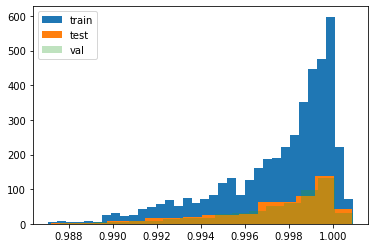

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


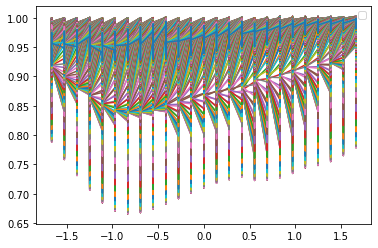

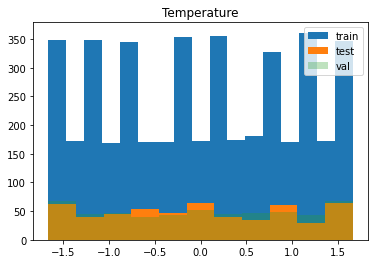

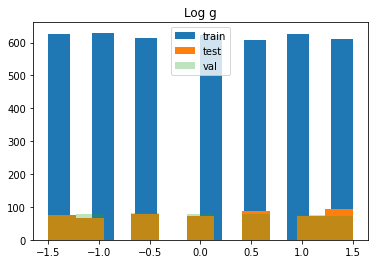

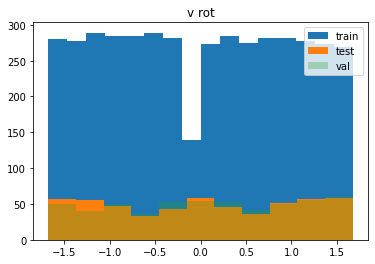

In [15]:
histograms_params(X_train[:,0], X_val[:,0], X_test[:,0], 0, ["train", "test", "val"])
plot_params(y_s[:,0],X, ["train", "test", "val"])

histograms_params(y_train[:,0], y_val[:,0], y_test[:,0], 0, ["train", "test", "val"],"Temperature")
histograms_params(y_train[:,1], y_val[:,1], y_test[:,1], 0, ["train", "test", "val"], "Log g")
histograms_params(y_train[:,2], y_val[:,2], y_test[:,2], 0, ["train", "test", "val"], "v rot")

In [16]:
import tensorflow as tf
import keras

### Optimizar los parámetros de esta red
***
- Puede cambiar la arquitectura, agregando o quitando capas, modificando las funciones de activación, cambiando la función de pérdida, etc.

In [17]:
def build_conv1D_model():
    n_timesteps = X_train_reshaped.shape[1] #201
    n_features  = X_train_reshaped.shape[2] #1 
    model = keras.Sequential(name="model_conv1D")
    model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
    model.add(keras.layers.Conv1D(filters=128, kernel_size=14, activation='swish', name="Conv1D_1"))
    
    #se agrega
    model.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='swish', name="Conv1D_2"))
    model.add(keras.layers.Conv1D(filters=32, kernel_size=7, activation='swish', name="Conv1D_3"))
    
    model.add(keras.layers.Conv1D(filters=16, kernel_size=3, activation='swish', name="Conv1D_4"))
    tf.keras.layers.BatchNormalization()
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(32, activation= "selu", name="Dense_1"))
    
    #se agregan
    model.add(keras.layers.Dense(16, activation= "selu", name="Dense_2"))
    model.add(keras.layers.Dense(8, activation= "selu", name="Dense_3"))
    
    model.add(keras.layers.Dense(3, activation = "linear", name="Dense_4"))
    learningRate = 0.0001
    
    text_file.write("\nLearning rate;"+str(learningRate).replace(".",","))
    optimizer = tf.keras.optimizers.RMSprop(learningRate)

    l = tf.keras.losses.LogCosh()
    lossFunction = "mse"
    
    text_file.write("\nloss function;"+str(lossFunction).replace(".",","))
    
    model.compile(loss=lossFunction,optimizer=optimizer,metrics=[lossFunction,'accuracy'])
    return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()
nlayers = len(model_conv1D.layers)
print("Layers: ",nlayers)
text_file.write("\nCapas;"+str(nlayers).replace(".",","))
text_file.write("\nEpoch;"+str(epochs).replace(".",","))
text_file.write("\nParametros;"+str(model_conv1D.count_params()).replace(".",","))


Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 188, 128)          1920      
                                                                 
 Conv1D_2 (Conv1D)           (None, 182, 64)           57408     
                                                                 
 Conv1D_3 (Conv1D)           (None, 176, 32)           14368     
                                                                 
 Conv1D_4 (Conv1D)           (None, 174, 16)           1552      
                                                                 
 flatten (Flatten)           (None, 2784)              0         
                                                                 
 Dense_1 (Dense)             (None, 32)                89120     
                                                                 
 Dense_2 (Dense)             (None, 16)               

18

In [18]:
ep = epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', 
                                                patience=5)
history = model_conv1D.fit(X_train_reshaped, y_train, epochs=ep,
                    validation_data = (X_val_reshaped, y_val), 
                           verbose=1, callbacks=[callback])



Epoch 1/50
136/136 [==============================] - 5s 31ms/step - loss: 0.9902 - mse: 0.9902 - accuracy: 0.3856 - val_loss: 0.9549 - val_mse: 0.9549 - val_accuracy: 0.4401
Epoch 2/50
136/136 [==============================] - 4s 29ms/step - loss: 0.7958 - mse: 0.7958 - accuracy: 0.5849 - val_loss: 0.6824 - val_mse: 0.6824 - val_accuracy: 0.6225
Epoch 3/50
136/136 [==============================] - 4s 29ms/step - loss: 0.6071 - mse: 0.6071 - accuracy: 0.6674 - val_loss: 0.5666 - val_mse: 0.5666 - val_accuracy: 0.7311
Epoch 4/50
136/136 [==============================] - 4s 30ms/step - loss: 0.5059 - mse: 0.5059 - accuracy: 0.7299 - val_loss: 0.4807 - val_mse: 0.4807 - val_accuracy: 0.7587
Epoch 5/50
136/136 [==============================] - 4s 30ms/step - loss: 0.4472 - mse: 0.4472 - accuracy: 0.7638 - val_loss: 0.4364 - val_mse: 0.4364 - val_accuracy: 0.7440
Epoch 6/50
136/136 [==============================] - 4s 29ms/step - loss: 0.4099 - mse: 0.4099 - accuracy: 0.7806 - val_loss

136/136 [==============================] - 4s 31ms/step - loss: 0.1482 - mse: 0.1482 - accuracy: 0.8714 - val_loss: 0.1558 - val_mse: 0.1558 - val_accuracy: 0.8637
Epoch 48/50
136/136 [==============================] - 4s 31ms/step - loss: 0.1447 - mse: 0.1447 - accuracy: 0.8746 - val_loss: 0.1318 - val_mse: 0.1318 - val_accuracy: 0.8766
Epoch 49/50
136/136 [==============================] - 4s 29ms/step - loss: 0.1414 - mse: 0.1414 - accuracy: 0.8820 - val_loss: 0.1560 - val_mse: 0.1560 - val_accuracy: 0.8508
Epoch 50/50
136/136 [==============================] - 4s 30ms/step - loss: 0.1425 - mse: 0.1425 - accuracy: 0.8792 - val_loss: 0.1285 - val_mse: 0.1285 - val_accuracy: 0.8766


Saved model_conv1D to disk:  ../informe1/v3_model_conv1D_e50_l9.h5
Testing set Mean Abs Error: 129,23742830753326
17/17 [==============================] - 0s 9ms/step


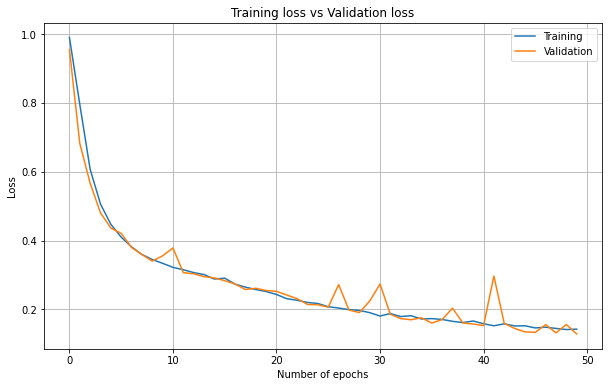

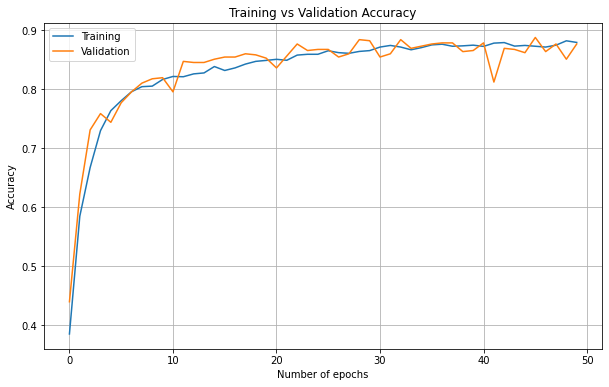

In [19]:
model_conv1D.save("../informe1/"+prefijo+"_model_conv1D_e"+str(epochs)+"_l"+str(nlayers)+".h5")
print("Saved model_conv1D to disk: ","../informe1/"+prefijo+"_model_conv1D_e"+str(epochs)+"_l"+str(nlayers)+".h5")

[loss, mae,accuracy] = model_conv1D.evaluate(X_test_reshaped, y_test, verbose=0)
print("Testing set Mean Abs Error: "+str(mae * 1000).replace(".",","))
text_file.write("\nTesting Mean Abs Error;"+str(mae * 1000).replace(".",","))

pred =model_conv1D.predict(X_test_reshaped)

y_pred_inv = scaler2.inverse_transform(y)


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

def plot_train_val(A, B, n, xlabel, ylabel, title):
    plt.figure(1, figsize=(10, 6))
    plt.plot(range(n),A)
    plt.plot(range(n),B)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend(['Training', 'Validation'])
    plt.savefig("../informe1/"+prefijo+"_loss_e"+str(epochs)+"_l"+str(nlayers)+".png",dpi='figure') #save as png
    #plt.savefig("../informe1/loss_e"+str(epochs)+"_l"+str(nlayers)+".jpg") #save as png
    plt.show()

plot_train_val(train_loss, val_loss, ep, 'Loss', 'Number of epochs', 'Training loss vs Validation loss')
plot_train_val(train_acc, val_acc, ep, 'Accuracy', 'Number of epochs', 'Training vs Validation Accuracy')


In [20]:
from sklearn.metrics import mean_absolute_error

(543,)
(543,)


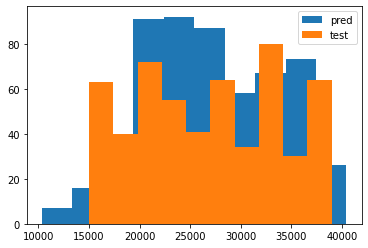

In [21]:
a = scaler2.inverse_transform(pred)
print(a[:,0].shape)


b = scaler2.inverse_transform(y_test)
print(b[:,0].shape)

plt.figure()
plt.hist(a[:,0], label="pred")
plt.hist(b[:,0], label="test")

plt.legend(loc="best")
plt.savefig("../informe1/"+prefijo+"_pre_vs_test_temperatura_e"+str(epochs)+"_l"+str(nlayers)+".png",dpi='figure') #save as png
plt.show()





In [22]:
pred[:,0].shape

(543,)

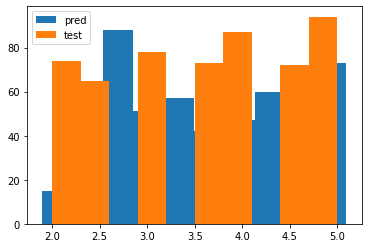

In [23]:
plt.figure()
plt.hist(a[:,1], label="pred")
plt.hist(b[:,1], label="test")

plt.legend(loc="best")
plt.savefig("../informe1/"+prefijo+"_pred_vs_test_logg_e"+str(epochs)+"_l"+str(nlayers)+".png",dpi='figure') #save as png
plt.show()



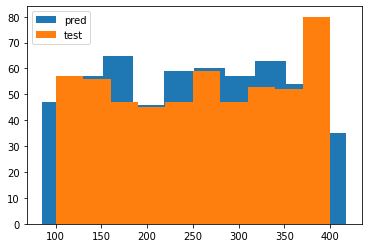

In [24]:

plt.figure()
plt.hist(a[:,2], label="pred")
plt.hist(b[:,2], label="test")

plt.legend(loc="best")
plt.savefig("../informe1/"+prefijo+"_pred_vs_test_velocidad_e"+str(epochs)+"_l"+str(nlayers)+".png",dpi='figure') #save as png
plt.show()



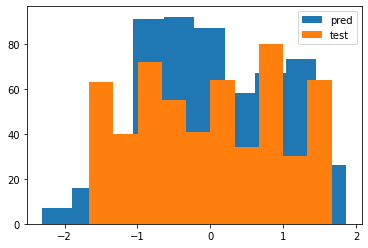

In [25]:
plt.figure()
plt.hist(pred[:,0], label="pred")
plt.hist(y_test[:,0], label="test")

plt.legend(loc="best")
plt.show()


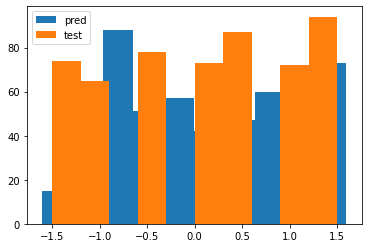

In [26]:
plt.figure()
plt.hist(pred[:,1], label="pred")
plt.hist(y_test[:,1], label="test")

plt.legend(loc="best")
plt.show()

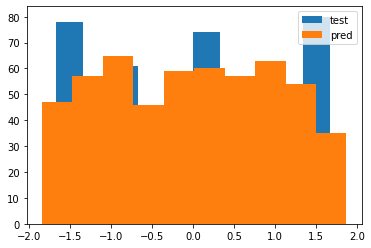

In [27]:
plt.figure()
plt.hist(y_test[:,2], label="test")
plt.hist(pred[:,2], label="pred")
plt.legend(loc="best")
plt.show()

In [28]:
mn = mean_absolute_error(pred, y_test)
print("Mean Absolute Error(nomalizado)=",mn)
text_file.write("\nMean Absolute Error(nomalizado);"+str(mn).replace(".",","))
#mean_absolute_error(a, b)
m = mean_absolute_error(a, b)
#tf.keras.metrics.max_error(a,b)
#MeanRelativeError
print("Mean Absolute Error=",m)
text_file.write("\nMean Absolute Error;"+str(m).replace(".",","))
rel_error = 2 * np.absolute(pred - y_test) / (np.absolute(pred) + np.absolute(y_test))
print("Error relativo normalizado: ",f"{round(rel_error.mean() * 100, 2)}% +/- {round(rel_error.std() * 100, 2)}%")
text_file.write("\nError relativo normalizado;"+f"{round(rel_error.mean() * 100, 2)}% +/- {round(rel_error.std() * 100, 2)}%".replace(".",","))
rel_error = 2 * np.absolute(a - b) / (np.absolute(a) + np.absolute(b))
print("Error relativo desnormalizado: ",f"{round(rel_error.mean() * 100, 2)}% +/- {round(rel_error.std() * 100, 2)}%")

text_file.write("\nError relativo desnormalizado;"+f"{round(rel_error.mean() * 100, 2)}% +/- {round(rel_error.std() * 100, 2)}%".replace(".",","))


Mean Absolute Error(nomalizado)= 0.24955748713752976
Mean Absolute Error= 626.478849396448
Error relativo normalizado:  50.51% +/- 61.78%
Error relativo desnormalizado:  7.81% +/- 8.59%


46

In [29]:
e_teff = abs(y_test[:,0] - pred[:,0])
e_logg = abs(y_test[:,1] - pred[:,1])
e_vrot = abs(y_test[:,2] - pred[:,2])

0.25936887802870506
Error relativo desnormalizado temperatura:  7.53% +/- 6.74%
Error relativo desnormalizado logg:  11.98% +/- 11.33%
Error relativo desnormalizado velocidad:  3.93% +/- 3.9%


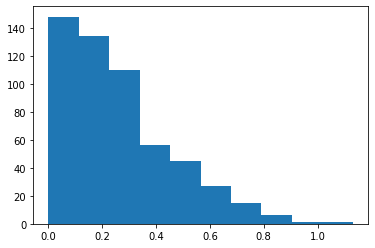

In [30]:
print(e_teff.mean())
rel_error = 2 * np.absolute(a[:,0]- b[:,0]) / (np.absolute(a[:,0]) + np.absolute(b[:,0]))
print("Error relativo desnormalizado temperatura: ",f"{round(rel_error.mean() * 100, 2)}% +/- {round(rel_error.std() * 100, 2)}%")
text_file.write("\nError relativo desnormalizado temperatura;"+f"{round(rel_error.mean() * 100, 2)}% +/- {round(rel_error.std() * 100, 2)}%".replace(".",","))
rel_error = 2 * np.absolute(a[:,1]- b[:,1]) / (np.absolute(a[:,1]) + np.absolute(b[:,1]))
print("Error relativo desnormalizado logg: ",f"{round(rel_error.mean() * 100, 2)}% +/- {round(rel_error.std() * 100, 2)}%")
text_file.write("\nError relativo desnormalizado logg;"+f"{round(rel_error.mean() * 100, 2)}% +/- {round(rel_error.std() * 100, 2)}%".replace(".",","))
rel_error = 2 * np.absolute(a[:,2]- b[:,2]) / (np.absolute(a[:,2]) + np.absolute(b[:,2]))
print("Error relativo desnormalizado velocidad: ",f"{round(rel_error.mean() * 100, 2)}% +/- {round(rel_error.std() * 100, 2)}%")
text_file.write("\nError relativo desnormalizado velocidad;"+f"{round(rel_error.mean() * 100, 2)}% +/- {round(rel_error.std() * 100, 2)}%".replace(".",","))



plt.figure()
plt.hist(e_teff)
plt.show()

0.3919338140727585


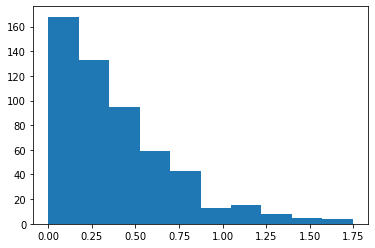

In [31]:
print(e_logg.mean())

plt.figure()
plt.hist(e_logg)
plt.show()

0.0973697693111258


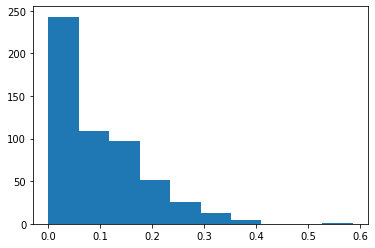

In [32]:
print(e_vrot.mean())

plt.figure()
plt.hist(e_vrot)
plt.show()

# BeSoS lines

In [33]:
df = pd.read_csv("../HD35411-BESOS/HD35411_2015-02-25_01-36-00_final_corr.txt", sep="\t", header=None)
#df = pd.read_csv("../filtered_wv_models/f_t15000g20v140.dat", sep=" ", header=None)

m1 = df[0] >= 4460
m2 = df[0] <= 4480

df2 = df[m1][m2]

df2

C:\Users\claud\AppData\Local\Temp\ipykernel_23660\4139545611.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df[m1][m2]


,0,1
2369,4460.017173,0.978701
2370,4460.106507,1.024083
2371,4460.195840,1.054551
2372,4460.285173,1.037242
2373,4460.374506,0.995095
...,...,...
2588,4479.581150,0.971979
2589,4479.670483,0.957869
2590,4479.759816,0.954362
2591,4479.849150,0.968432


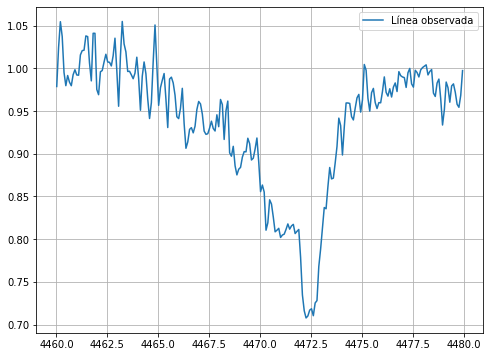

In [34]:
plt.figure(figsize=(8,6))
plt.plot(df2[0], df2[1], label="Línea observada")
#plt.plot(df4[0], df4[1], label="Modelo")
plt.grid()
plt.legend(loc="best")
plt.show()

In [35]:
n = 201  # for 2 random indices
index = np.random.choice(df2[0].shape[0], n, replace=False) 

In [36]:
index.sort()
index

array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  88,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 104, 105, 106, 107, 108, 109, 111, 112, 113,
       114, 115, 116, 118, 120, 122, 123, 124, 125, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144,
       145, 146, 147, 148, 150, 151, 152, 153, 155, 156, 157, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 193, 195, 196, 197, 198, 199, 200, 20

In [37]:
print(df2.shape)
obs_waves = df2[0].values[index]

obs_flux = df2[1].values[index]

from numpy import savetxt
savetxt('../informe1/'+prefijo+'_obs_waves.csv', obs_waves, delimiter=';')
savetxt('../informe1/'+prefijo+'_obs_flux.csv', obs_flux, delimiter=';')

(224, 2)


In [38]:
obs_flux.shape

(201,)

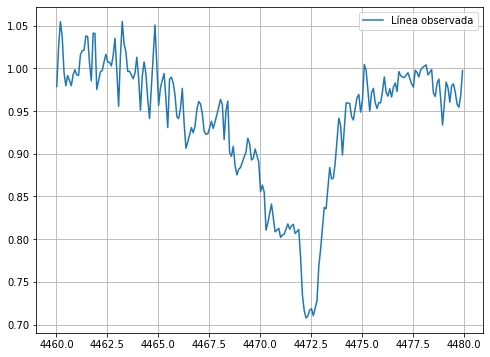

In [39]:
plt.figure(figsize=(8,6))
plt.plot(obs_waves, obs_flux ,label="Línea observada")
plt.grid()
plt.legend(loc="best")
plt.show()


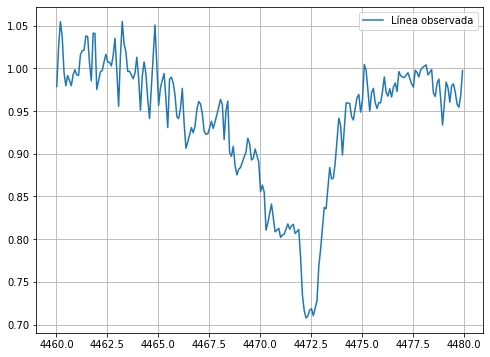

In [40]:
#obs_x_reshaped = x_obs_inv.reshape((1, time_steps, input_dimension))
#obs_x_reshaped = obs_x.reshape((1, time_steps, input_dimension))
time_steps =obs_flux.shape[0]

input_dimension = 1
obs_flux_reshaped = obs_flux.reshape((1, time_steps, input_dimension))

xx = obs_flux_reshaped[0]
xx0 = xx[:,0]
plt.figure(figsize=(8,6))
plt.plot(obs_waves, xx0 ,label="Línea observada")
plt.grid()
plt.legend(loc="best")
plt.show()

In [41]:

pred_obs =model_conv1D.predict(obs_flux_reshaped)

1/1 [==============================] - 0s 14ms/step


In [42]:
# Acá los resultados es con los datos normalizados
print("t_eff:", pred_obs[0][0])
print("log g:", pred_obs[0][1])
print("v_rot:", pred_obs[0][2])
#text_file.write("\nt_eff;"+str(pred_obs[0][0]).replace(".",","))
#text_file.write("\nlog g;"+str(pred_obs[0][1]).replace(".",","))
#text_file.write("\nv_rot;"+str(pred_obs[0][2]).replace(".",","))

t_eff: -2.609338
log g: 0.269329
v_rot: 0.12674484


## "Desnormalización de la predicción"

In [43]:
pred_obs_inv = scaler2.inverse_transform(pred_obs)

In [44]:
pred_obs_inv

array([[8.183795e+03, 3.769329e+00, 2.613364e+02]], dtype=float32)

In [45]:
print(pred_obs_inv[0,0])
print(pred_obs_inv[0,1])
print(pred_obs_inv[0,2])
#text_file.write("\nDesnormalizada; ")
#text_file.write("\nt_eff;"+str(pred_obs_inv[0][0]).replace(".",","))
#text_file.write("\nlog g;"+str(pred_obs_inv[0][1]).replace(".",","))
#text_file.write("\nv_rot;"+str(pred_obs_inv[0][2]).replace(".",","))

8183.795
3.769329
261.3364


In [46]:
import warnings
warnings.simplefilter("ignore")
ncorridas=1000
res0=[0 for i in range(ncorridas)]
res1=[0 for i in range(ncorridas)]
res2=[0 for i in range(ncorridas)]
for i in range(ncorridas):
    
    df = pd.read_csv("../HD35411-BESOS/HD35411_2015-02-25_01-36-00_final_corr.txt", sep="\t", header=None)
    m1 = df[0] >= 4460
    m2 = df[0] <= 4480
    df2 = df[m1][m2]
    
   # df2=df_in
    n = 201  # for 2 random indices
    index = np.random.choice(df2[0].shape[0], n, replace=False) 
    index.sort()
    obs_waves = df2[0].values[index]
    #print("datos normalizados 1 ",i)
    obs_flux = df2[1].values[index]
    obs_flux.shape
    obs_flux_reshaped = obs_flux.reshape((1, time_steps, input_dimension))
    pred_obs =model_conv1D.predict(obs_flux_reshaped)
    #print("datos normalizados ",i)
    # Acá los resultados es con los datos normalizados
    #print("t_eff:", pred_obs[0][0])
    #print("log g:", pred_obs[0][1])
    #print("v_rot:", pred_obs[0][2])
    pred_obs_inv = scaler2.inverse_transform(pred_obs)
    #pred_obs_inv
    #print("datos normalizados ",i)
    # Acá los resultados es con los datos des-normalizados
    #print("t_eff:",pred_obs_inv[0,0])
    #print("log g:",pred_obs_inv[0,1])
    #print("v_rot:",pred_obs_inv[0,2])
    res0[i]=pred_obs_inv[0,0]
    res1[i]=pred_obs_inv[0,1]
    res2[i]=pred_obs_inv[0,2]
    
warnings.resetwarnings()

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 23ms/step


In [47]:
#print(res0)   
import statistics
print("Repeticiones: ",ncorridas)
#text_file.write("\nRepeticiones;"+str(ncorridas).replace(".",","))
mean = statistics.mean(res0)
dev = statistics.stdev(res0)
mediana = statistics.median(res0)
moda = statistics.mode(res0)
print("data temperatura:")
print(mean)
print(dev)
print(mediana)
print(moda)
#text_file.write("\ndata temperatura; ")
##text_file.write("\nmedia;"+str(mean).replace(".",","))
#text_file.write("\ndev;"+str(dev).replace(".",","))
#text_file.write("\nmediana;"+str(mediana).replace(".",","))
#text_file.write("\nmoda;"+str(moda).replace(".",","))
mean = statistics.mean(res1)
dev = statistics.stdev(res1)
mediana = statistics.median(res1)
moda = statistics.mode(res1)
print("data log g:")
print(mean)
print(dev)
print(mediana)
print(moda)
#text_file.write("\ndata logg; ")
#text_file.write("\nmedia;"+str(mean).replace(".",","))
#text_file.write("\ndev;"+str(dev).replace(".",","))
#text_file.write("\nmediana;"+str(mediana).replace(".",","))
#text_file.write("\nmoda;"+str(moda).replace(".",","))
mean = statistics.mean(res2)
dev = statistics.stdev(res2)
mediana = statistics.median(res2)
moda = statistics.mode(res2)
print("data velocidad:")
print(mean)
print(dev)
print(mediana)
print(moda)
#text_file.write("\ndata velocidad; ")
#text_file.write("\nmedia;"+str(mean).replace(".",","))
#text_file.write("\ndev;"+str(dev).replace(".",","))
#text_file.write("\nmediana;"+str(mediana).replace(".",","))
#text_file.write("\nmoda;"+str(moda).replace(".",","))
print("fin")   

Repeticiones:  1000
data temperatura:
10952.383
5090.510976316621
10284.4912109375
12275.791
data log g:
3.8750753
0.2761022153462225
3.86470890045166
3.641246
data velocidad:
255.79095
45.38596953320211
262.5130310058594
245.04558
fin


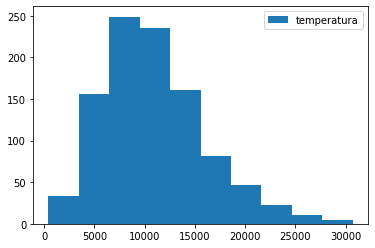

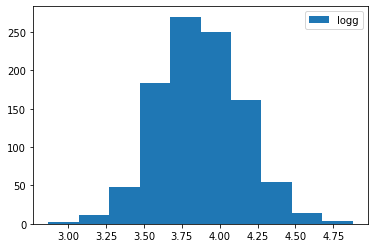

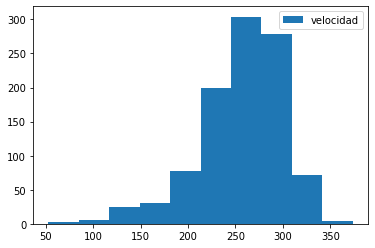

In [48]:
plt.figure()
plt.hist(res0, label="temperatura")
plt.legend(loc="best")
plt.savefig("../informe1/"+prefijo+"_prediccion_temperatura_e"+str(epochs)+"_l"+str(nlayers)+".png",dpi='figure') #save as png
plt.show()

plt.figure()
plt.hist(res1, label="logg")
plt.legend(loc="best")
plt.savefig("../informe1/"+prefijo+"_prediccion_logg_e"+str(epochs)+"_l"+str(nlayers)+".png",dpi='figure') #save as png
plt.show()

plt.figure()
plt.hist(res2, label="velocidad")
plt.legend(loc="best")
plt.savefig("../informe1/"+prefijo+"_prediccion_velocidad_e"+str(epochs)+"_l"+str(nlayers)+".png",dpi='figure') #save as png
plt.show()



In [49]:
text_file.close()